In [1]:
#workhorses
import numpy as np
import pandas as pd

#for custom colormaps
from matplotlib.colors import LinearSegmentedColormap

In [2]:
#plotting things

#%matplotlib qt5 -- I don't know what this is
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from cycler import cycler


#All of Anandh's customized seaborn/matplotlib settings

sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

#%config InlineBackend.figure_f.ormats=['svg']

mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#mpl.rc('text', usetex=False)
#mpl.rc('text.latex', preamble=r'\usepackage{helvet}
#\renewcommand\familydefault{\sfdefault}\usepackage{sansmath}\sansmath')

    #If you want to use a different font
# mpl.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica'], 
#                  'serif': ['Helvetica']})

tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})

mpl.rc('xtick', labelsize=14) 
mpl.rc('ytick', labelsize=14)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)
mpl.rc('figure', figsize=(9,8))

## get data

In [3]:
# directory = 'Z:/Reed/Projects/micro_consortia/DARPA_biocon/Task 1.1/A=B/20181128 A=B cfp yfp screen 1/'

directory = r"Z:\Reed\Projects\micro_consortia\DARPA_biocon\Task 1.1\A=B\20181009 top 4 AB vars A=B 1"

filename = '\\20181009 top 4 A B cell variants A=B sampling exp 1.xlsx'

In [4]:
data_dict = pd.read_excel(directory + filename, sheet_name=None)

In [5]:
data_dict.keys()

odict_keys(['OD700', 'YFP', 'BFP', 'IDs', 'Exp-btek'])

## create data you want to plot

In [6]:
sheets_to_plot = [x for x in data_dict.keys() if '_tidy' in x]

In [35]:
ot, c61, c100, y61, y100, norm_fluor = [data_dict[sheet] for sheet in sheets_to_plot]

## Normalized fluorescence

### making the proper data columns to plot

In [36]:
norm_fluor.head()

,Time,Temp C,well,od700,a,b,iptg,atc,ab seed ratio vol,cfp61,cfp100,yfp61,yfp100,cfp61_odnorm,cfp100_odnorm,yfp61_odnorm,yfp100_odnorm
0,0.261389,37.0,A1,0.076,1,x,1,0,n,547,19159,43,1660,7197.368421,252092.105263,565.789474,21842.105263
1,0.594722,37.1,A1,0.076,1,x,1,0,n,530,19050,42,1555,6973.684211,250657.894737,552.631579,20460.526316
2,0.928056,37.0,A1,0.076,1,x,1,0,n,528,19429,39,1573,6947.368421,255644.736842,513.157895,20697.368421
3,1.261389,37.0,A1,0.076,1,x,1,0,n,553,18788,39,1599,7276.315789,247210.526316,513.157895,21039.473684
4,1.594722,36.9,A1,0.076,1,x,1,0,n,526,18999,48,1501,6921.052632,249986.842105,631.578947,19750.000000


In [37]:
cfp100_sub = norm_fluor['cfp100'] - min(norm_fluor['cfp100'])
yfp100_sub = norm_fluor['yfp100'] - min(norm_fluor['yfp100'])

norm_fluor = norm_fluor.assign(c_sub = cfp100_sub, y_sub = yfp100_sub)

In [38]:
scaling_cfp = max(np.unique(norm_fluor['y_sub'])) / max(np.unique(norm_fluor['c_sub']))

In [39]:
norm_fluor['c_sub'] = norm_fluor['c_sub'] * scaling_cfp

In [54]:
norm_fluor['frac_y'] = (norm_fluor['y_sub'] / (norm_fluor['y_sub'] + norm_fluor['c_sub']))**2

### index and plot

In [55]:
#get just the ones that have only A cells (CFP)
idx1 = norm_fluor['ab seed ratio vol'] == 'n'

#the ones that aren't monocultures
idx2 = norm_fluor['ab seed ratio vol'] != 'n'

In [98]:
def scatter_on_off (x, y, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    c = kwargs.pop("colors")
    
    #get the OFF values
    off = data['iptg'] == 0
    
    sns.scatterplot(x=x, y=y, data=data.loc[off], ax=ax, size='Time', sizes=kwargs['s'], color=c[1], edgecolors=None, alpha=kwargs['alpha'])
    
    #ON
    on = data['iptg'] == 1
    
    sns.scatterplot(x=x, y=y, data=data.loc[on], ax=ax, size='Time', sizes=kwargs['s'], color=c[0], edgecolors=None, alpha=kwargs['alpha'])

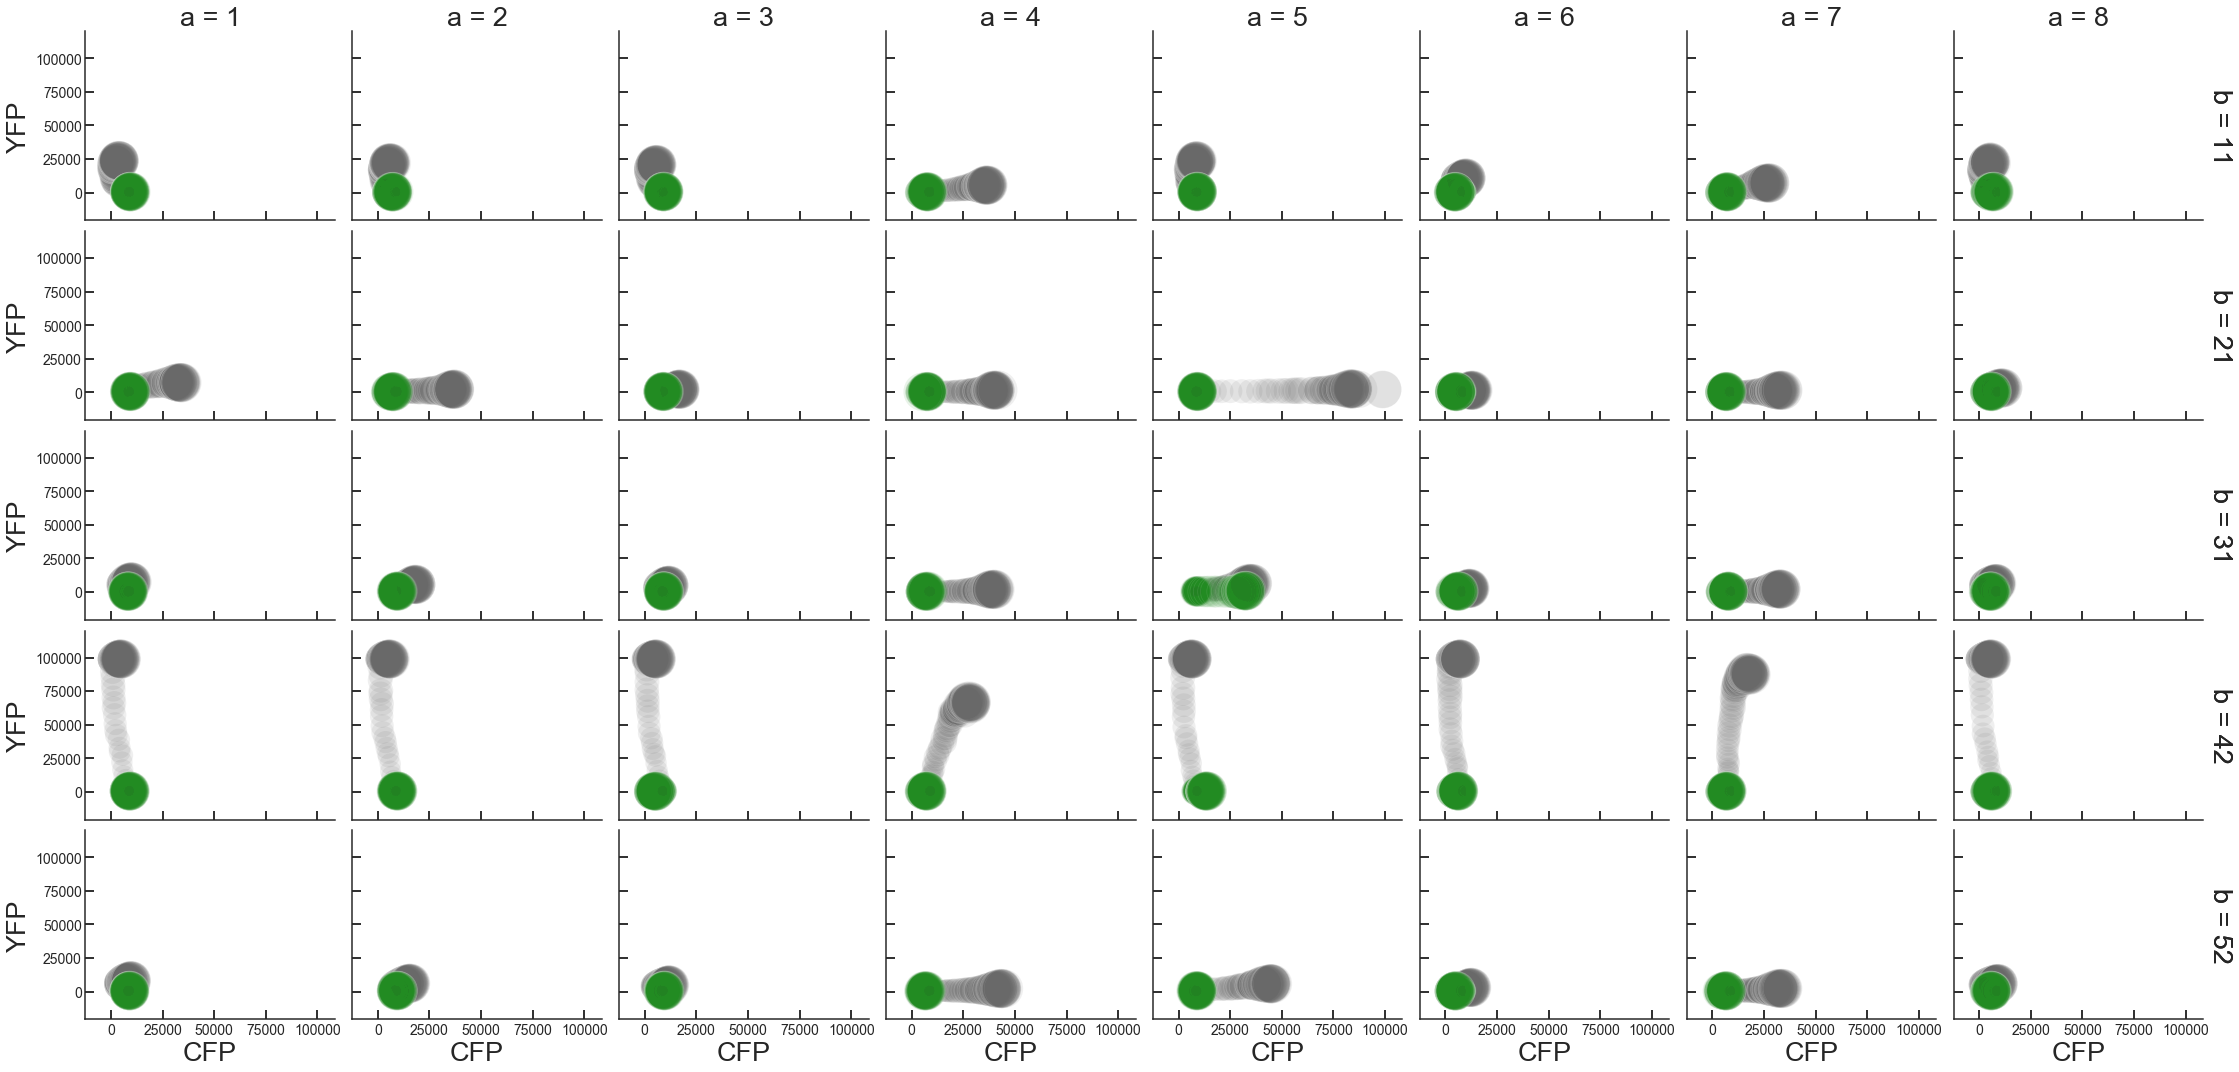

In [99]:
colors = ['forestgreen', 'dimgray']

g = sns.FacetGrid(norm_fluor.loc[idx2], col="a", row = 'b',
                  height=3, aspect=1.3, margin_titles=True, legend_out=True)


g.map_dataframe(scatter_on_off, "c_sub", "y_sub", colors=colors, alpha=0.1, s=(100,1550))


g.set_titles("")
g.set_axis_labels('CFP', "YFP")

#fix the titles
axes = g.axes.flatten()

# for ax in axes:
#     ax.title.set_text(fix_title(ax))

In [100]:
g.savefig(directory + 'both_fluor_scatter.pdf')

## Generate a facetgrid for all the wells showing just OD

In [101]:
def fix_title (axes_obj):
    
    title_str = axes_obj.title.get_text()
    
    new_title = 'A' + title_str[0] + ' + ' + 'B' + title_str[1:]
    
    return new_title

In [33]:
#create a column I can use facetgrid to hue on
ot = ot.assign(ab_id = ot['a'].astype(str) + ot['b'].astype(str))

In [102]:
#remove the non mixed singe cell populations
idx1 = ot['ab seed ratio vol'] != 'n'

#exclude the final half induced wells
idx2 = ~((ot['atc'] == 0) & (ot['iptg'] == 1))

#composite index

i = idx1 #& idx2

In [103]:
ot.loc[i].head()

,Time,Temp C,well,od700,a,b,iptg,atc,ab seed ratio vol
130,0.261389,37.0,A10,0.078,1,42,0,0,0.5
131,0.594722,37.1,A10,0.078,1,42,0,0,0.5
132,0.928056,37.0,A10,0.078,1,42,0,0,0.5
133,1.261389,37.0,A10,0.078,1,42,0,0,0.5
134,1.594722,36.9,A10,0.078,1,42,0,0,0.5


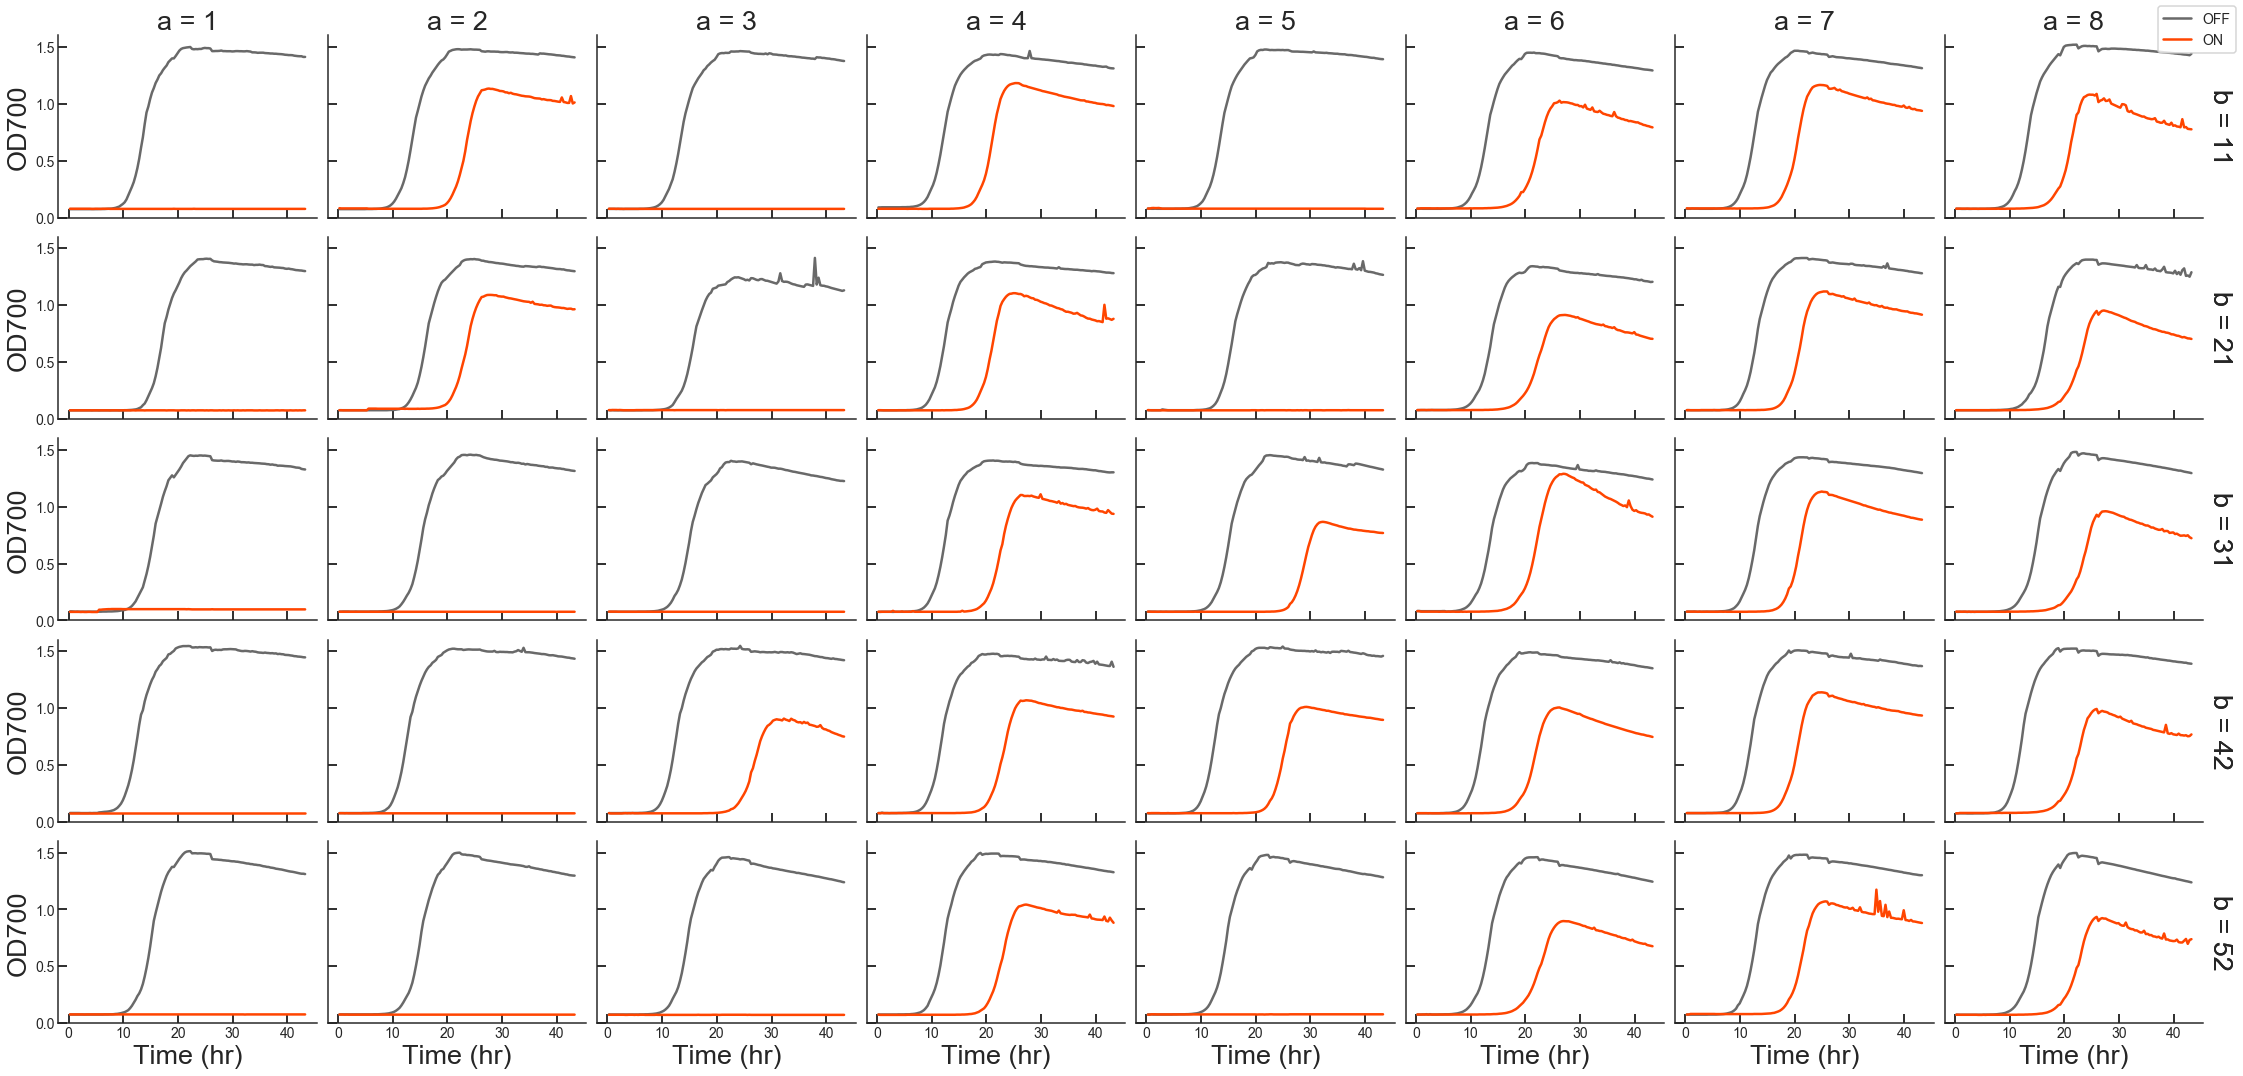

In [106]:
pal = {0 : "dimgray", 1 : 'orangered'}

g = sns.FacetGrid(ot.loc[i], col='a', row='b', hue='iptg', palette=pal,
                  height=3, aspect=1.3, ylim=(0,1.6), margin_titles=True, legend_out=True)


g.map(plt.plot, "Time", "od700", linewidth=2.5)

g.fig.legend(labels=['OFF', 'ON'])

g.set_titles("{col_name}")
g.set_axis_labels('Time (hr)', "OD700")

#fix the titles
# axes = g.axes.flatten()

# for ax in axes:
#     ax.title.set_text(fix_title(ax))

In [108]:
g.savefig(directory + 'allABcombos_on.pdf')